In [1]:
# Predicting rainfall - yes / no (boolean values)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure inline plotting if using Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [6]:
import pandas as pd

# 1978 to 2022
file_path =r"C:\Users\apoor\OneDrive\Desktop\sikkim.data\all_combined_rainfall_data.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

        Date    Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0 1901-01-01  Day_1  1901      1    Loc_0               3.0     27.25   
1 1901-01-02  Day_2  1901      1    Loc_0               8.0     27.25   
2 1901-01-03  Day_3  1901      1    Loc_0               0.0     27.25   
3 1901-01-04  Day_4  1901      1    Loc_0               0.0     27.25   
4 1901-01-05  Day_5  1901      1    Loc_0               0.0     27.25   

   Longitude  Quarter  Cumulative_Rainfall  Previous_Day_Rainfall  Weekly Sum  \
0      88.25        1                  3.0                    0.0         3.0   
1      88.25        1                 11.0                    3.0        11.0   
2      88.25        1                 11.0                    8.0        11.0   
3      88.25        1                  8.0                    0.0        11.0   
4      88.25        1                  0.0                    0.0        11.0   

   Weekly_Average hasRainfall Landslide_possibility  Season  \
0        3.

In [32]:
data.shape

(677600, 20)

In [33]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season', 'Location_File', 'class',
       'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [34]:
data['class'] = data['Rainfall (in mm)'].apply(lambda x : 1 if x > 0 else 0)
data.head()

# divided in classes - 1 for rainfall, 0 for no rainfall

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season,Location_File,class,Day_of_Week,Day_of_Year
0,1901-01-01,Day_1,1901,1,0,3.0,27.25,88.25,1,3.0,0.0,3.0,3.000000,yes,no,Winter,modified_location_0.xlsx,1,1,1
1,1901-01-02,Day_2,1901,1,0,8.0,27.25,88.25,1,11.0,3.0,11.0,5.500000,yes,no,Winter,modified_location_0.xlsx,1,2,2
2,1901-01-03,Day_3,1901,1,0,0.0,27.25,88.25,1,11.0,8.0,11.0,3.666667,no,no,Winter,modified_location_0.xlsx,0,3,3
3,1901-01-04,Day_4,1901,1,0,0.0,27.25,88.25,1,8.0,0.0,11.0,2.750000,no,no,Winter,modified_location_0.xlsx,0,4,4
4,1901-01-05,Day_5,1901,1,0,0.0,27.25,88.25,1,0.0,0.0,11.0,2.200000,no,no,Winter,modified_location_0.xlsx,0,5,5


In [35]:
data['class'].value_counts()

class
1    365613
0    311987
Name: count, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677600 entries, 0 to 677599
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   677600 non-null  datetime64[ns]
 1   Day                    677600 non-null  object        
 2   Year                   677600 non-null  int64         
 3   Month                  677600 non-null  int64         
 4   Location               677600 non-null  int64         
 5   Rainfall (in mm)       677600 non-null  float64       
 6   Latitude               677600 non-null  float64       
 7   Longitude              677600 non-null  float64       
 8   Quarter                677600 non-null  int64         
 9   Cumulative_Rainfall    677600 non-null  float64       
 10  Previous_Day_Rainfall  677600 non-null  float64       
 11  Weekly Sum             677600 non-null  float64       
 12  Weekly_Average         677600 non-null  floa

In [37]:
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['Day_of_Year'] = data['Date'].dt.dayofyear  # Day of the year (1-365/366) 

In [38]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season', 'Location_File', 'class',
       'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

In [40]:
X = data.drop(['class','Quarter','Date','Day','Rainfall (in mm)'] , axis = 1)
y = data['class']

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X and y are already defined and cleaned
# If y contains strings like "yes"/"no", convert them:
# y = y.map({'yes': 1, 'no': 0})  # or use LabelEncoder if multiclass

# Train-test split (60% train, 40% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

# One-hot encode categorical features if needed
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure train and test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Create and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[124795      0]
 [     0 146245]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    124795
           1       1.00      1.00      1.00    146245

    accuracy                           1.00    271040
   macro avg       1.00      1.00      1.00    271040
weighted avg       1.00      1.00      1.00    271040



In [42]:
print(X.columns)

Index(['Year', 'Month', 'Location', 'Latitude', 'Longitude',
       'Cumulative_Rainfall', 'Previous_Day_Rainfall', 'Weekly Sum',
       'Weekly_Average', 'hasRainfall', 'Landslide_possibility', 'Season',
       'Location_File', 'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [ ]:
y_pred = model.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    124795
           1       1.00      1.00      1.00    146245

    accuracy                           1.00    271040
   macro avg       1.00      1.00      1.00    271040
weighted avg       1.00      1.00      1.00    271040



In [44]:
from sklearn.linear_model import SGDClassifier
# changed from SVC() then LinearSVC()
model = SGDClassifier(loss="hinge")  # Hinge loss is used for SVM
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    124795
           1       1.00      1.00      1.00    146245

    accuracy                           1.00    271040
   macro avg       1.00      1.00      1.00    271040
weighted avg       1.00      1.00      1.00    271040



In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    124795
           1       1.00      1.00      1.00    146245

    accuracy                           1.00    271040
   macro avg       1.00      1.00      1.00    271040
weighted avg       1.00      1.00      1.00    271040



In [46]:
new = data[data['Location'] == 0]
new.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season,Location_File,class,Day_of_Week,Day_of_Year
0,1901-01-01,Day_1,1901,1,0,3.0,27.25,88.25,1,3.0,0.0,3.0,3.000000,yes,no,Winter,modified_location_0.xlsx,1,1,1
1,1901-01-02,Day_2,1901,1,0,8.0,27.25,88.25,1,11.0,3.0,11.0,5.500000,yes,no,Winter,modified_location_0.xlsx,1,2,2
2,1901-01-03,Day_3,1901,1,0,0.0,27.25,88.25,1,11.0,8.0,11.0,3.666667,no,no,Winter,modified_location_0.xlsx,0,3,3
3,1901-01-04,Day_4,1901,1,0,0.0,27.25,88.25,1,8.0,0.0,11.0,2.750000,no,no,Winter,modified_location_0.xlsx,0,4,4
4,1901-01-05,Day_5,1901,1,0,0.0,27.25,88.25,1,0.0,0.0,11.0,2.200000,no,no,Winter,modified_location_0.xlsx,0,5,5


In [47]:
new.shape

(61600, 20)

<Axes: xlabel='Month', ylabel='Rainfall (in mm)'>

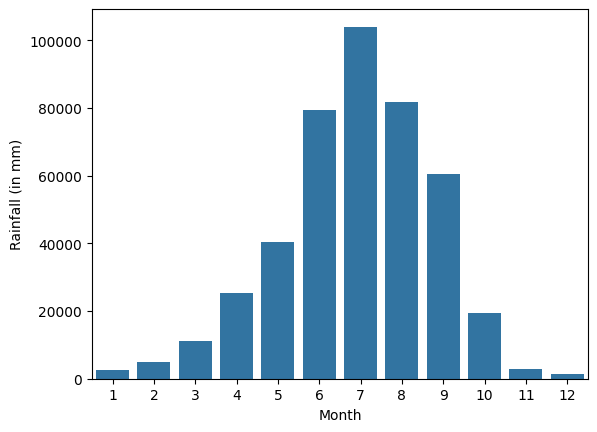

In [48]:
# checking which month has the highest rainfall for location 0
monthly_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().reset_index()

# Plotting the total rainfall for each month
sns.barplot(x='Month', y='Rainfall (in mm)', data=monthly_rainfall)

**We can see that location 0 experience most rainfall in 8th month i.e august**

In [49]:
monthly_rainfall

,Month,Rainfall (in mm)
0,1,2643.0
1,2,4857.2
2,3,11063.2
3,4,25295.4
4,5,40444.6
5,6,79342.0
6,7,103968.6
7,8,81654.0
8,9,60395.8
9,10,19349.0


In [50]:
most_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().max()
most_rainfall

np.float64(103968.6)

In [51]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,0,2643.0
1,1,1,2616.0
2,1,2,3836.4
3,1,3,2182.2
4,1,4,4388.4
...,...,...,...
127,12,6,1883.0
128,12,7,2075.2
129,12,8,1993.0
130,12,9,2023.0


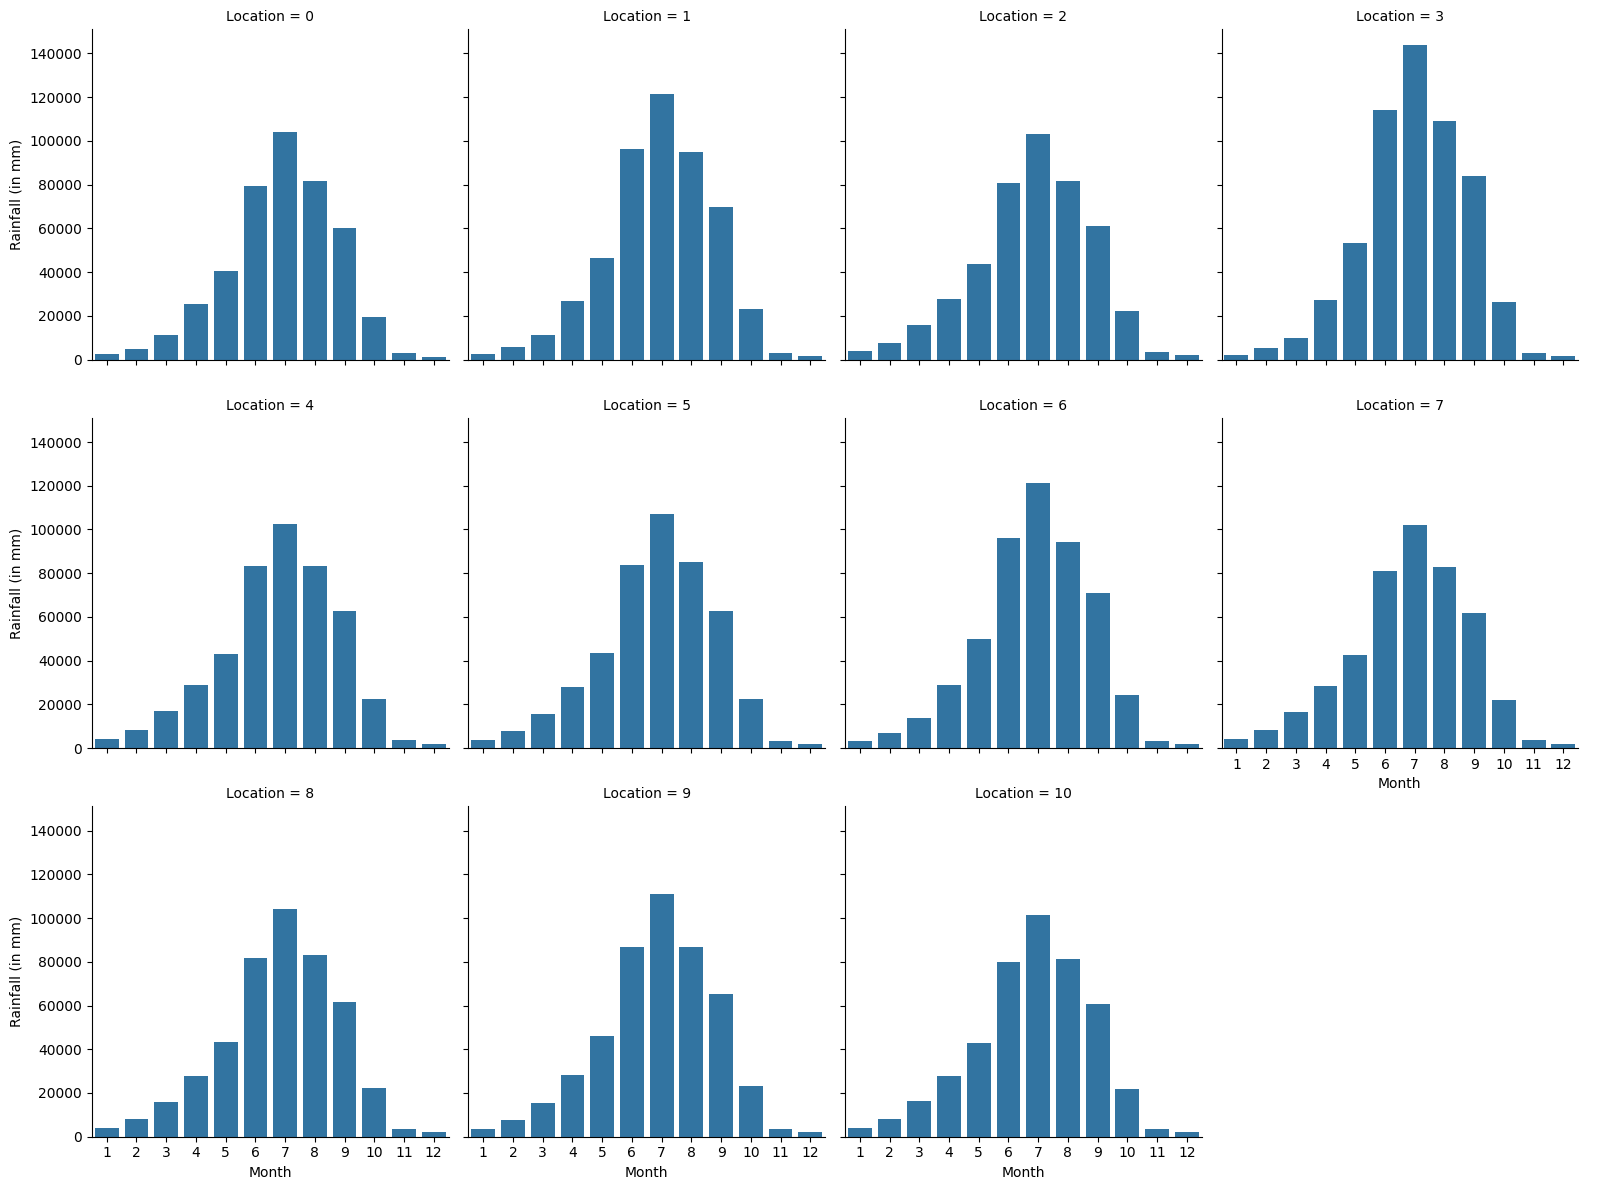

In [52]:
# g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
# g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

sns.catplot(
    data=monthly_location_rainfall,
    kind="bar",
    x="Month",
    y="Rainfall (in mm)",
    col="Location",
    col_wrap=4,
    order=range(1, 13),
    height=4
)


**We can see that all 11 locations experience highest rainfalls in the months of june, july, august**